In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#matplotlib inline

In [2]:
def pho(x,t,fc,bf,ubf):
      # ------Variables-------#
    DiPhoBpp,DiPhoR,DiPhoRp,DiPhoRpPhoB,DiPhoRpp,DiPhoRppPhoB,PhoA,PhoB,PhoBp,mRNAa,mRNAb,pPhoB,pPhoBa,DiPhoRPhoBp = x

    # ------Parameters-------#
    rate_1 = 25.3658*fc 
    rate_1r = 8.1165 
    rate_2 = 25.3658*fc 
    rate_2r = 8.1165 
    rate_3 = 100
    rate_3r = 44.9411 
    rate_4 = 21.3718 
    rate_5 = 100
    rate_5r = 94.9411 
    rate_6 = 21.3718 
    rate_7 = 100
    rate_7r = 24.9411 
    rate_8 = 100
    rate_8r = 34.9411
    rate_9 = 12.95
    rate_10 = 10000*bf
    rate_10r = 1000*ubf
    rate_11 = 0.0540
    rate_12 = 0.0302
    rate_13 = 0.130 
    rate_14 = 0.035 
    rate_15 = 0.0302 
    rate_16 = 0.0001
    rate_17 = 0.0001
    rate_18 = 0.0001
    rate_19 = 0.0055
    rate_20 = 0.0055


    # -------Equations---------#

    DiPhoBpp_dot = rate_7 * PhoBp**2 -1 * rate_7r * DiPhoBpp -1 * rate_10 * DiPhoBpp* pPhoB -1 * rate_10 * DiPhoBpp * pPhoB + rate_10r * pPhoBa + rate_10r * pPhoBa
    DiPhoR_dot = -1 * rate_1 * DiPhoR + rate_1r * DiPhoRp + rate_6 * DiPhoRpPhoB -1 * rate_8 * DiPhoR * PhoBp + rate_8r * DiPhoRPhoBp + rate_9 * DiPhoRPhoBp + rate_15 * mRNAb -1 * rate_18 * DiPhoR
    DiPhoRp_dot = rate_1 * DiPhoR -1 * rate_1r * DiPhoRp -1 * rate_2 * DiPhoRp + rate_2r * DiPhoRpp + rate_4 * DiPhoRppPhoB -1 * rate_5 * DiPhoRp * PhoB + rate_5r * DiPhoRpPhoB
    DiPhoRpPhoB_dot = rate_5 * DiPhoRp * PhoB -1 * rate_5r * DiPhoRpPhoB -1 * rate_6 * DiPhoRpPhoB
    DiPhoRpp_dot = rate_2 * DiPhoRp -1 * rate_2r * DiPhoRpp -1 * rate_3 * DiPhoRpp * PhoB + rate_3r * DiPhoRppPhoB
    DiPhoRppPhoB_dot = rate_3 * DiPhoRpp * PhoB -1 * rate_3r * DiPhoRppPhoB -1 * rate_4 * DiPhoRppPhoB
    PhoA_dot = rate_12 * mRNAa -1 * rate_16 * PhoA
    PhoB_dot = -1 * rate_3 * DiPhoRpp * PhoB + rate_3r * DiPhoRppPhoB -1 * rate_5 *DiPhoRp * PhoB + rate_5r * DiPhoRpPhoB + rate_9 * DiPhoRPhoBp + rate_14 * mRNAb -1 * rate_17 * PhoB
    PhoBp_dot = rate_4 * DiPhoRppPhoB + rate_6 * DiPhoRpPhoB -2 * rate_7 * PhoBp**2 + 2 * rate_7r * DiPhoBpp -1 * rate_8 * DiPhoR * PhoBp + rate_8r * DiPhoRPhoBp
    mRNAa_dot = rate_11 * pPhoBa -1 * rate_19 * mRNAa
    mRNAb_dot = rate_13 * pPhoBa -1 * rate_20 * mRNAb
    pPhoB_dot = -1 * rate_10 * DiPhoBpp * pPhoB + rate_10r * pPhoBa
    pPhoBa_dot = rate_10 * DiPhoBpp * pPhoB -1 * rate_10r * pPhoBa
    DiPhoRPhoBp_dot = rate_8 * DiPhoR * PhoBp -1 * rate_8r * DiPhoRPhoBp -1 * rate_9 * DiPhoRPhoBp

    # -------Vector to return-------
    xdot = [DiPhoBpp_dot,DiPhoR_dot,DiPhoRp_dot,
            DiPhoRpPhoB_dot,DiPhoRpp_dot,DiPhoRppPhoB_dot,
            PhoA_dot,PhoB_dot,PhoBp_dot,mRNAa_dot,
            mRNAb_dot,
            pPhoB_dot,pPhoBa_dot,DiPhoRPhoBp_dot]
    
    return xdot


In [3]:
# ----Initial Conditions for the States----- #
DiPhoBpp_0 = 6e-08
DiPhoR_0 = 0.22
DiPhoRp_0 = 0
DiPhoRpPhoB_0 = 0
DiPhoRpp_0 = 4e-08
DiPhoRppPhoB_0 = 0
PhoA_0 = 0
PhoB_0 = 0.22
PhoBp_0 = 0
mRNAa_0 = 0.00166
mRNAb_0 = 0.00166
pPhoB_0 = 0.0332
pPhoBa_0 = 0
DiPhoRPhoBp_0 = 0

# final time for simulation
tf = 16200

# initial value vector
x_init = [DiPhoBpp_0,DiPhoR_0,DiPhoRp_0,DiPhoRpPhoB_0,DiPhoRpp_0,
          DiPhoRppPhoB_0,PhoA_0,PhoB_0,PhoBp_0,mRNAa_0,mRNAb_0,
          pPhoB_0,pPhoBa_0,DiPhoRPhoBp_0]


color1 = [0, 0.4470, 0.7410]
color2 = [0.3410, 0.7690, 0.3470]
color3 = [0.8500, 0.3250, 0.0980]
colors = [color1, color2, color3]

species = ["DiPhoBpp","DiPhoR","DiPhoRp","DiPhoRpPhoB","DiPhoRpp","DiPhoRppPhoB","PhoA","PhoB","PhoBp","mRNAa","mRNAb","pPhoB","pPhoBa","DiPhoRPhoBp"]

In [4]:
def plot(species_number,fc_value,bf,ubf):
    fc = [1,0.5,0.1]
    t = np.linspace(0, tf, 1000000)
    for bf_value in bf:
        Conc = spi.odeint(pho,x_init,t,args=(fc_value,bf_value,ubf))
        plt.plot(t/3600,Conc[:,species_number],'-',linewidth=2.0)
    plt.title(species[species_number], fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.grid(True)
    plt.ylabel('Concentration ($\mu$M)', fontsize=22)
    plt.xlabel('Time (hr)', fontsize=22)
    #plt.legend(['fc = 1','fc = 0.5','fc = 0.1'], fontsize=22)
    plt.show()

# plot(12,1,[0.5,0.5,2,1.5,2.5],10)

In [5]:
def activity_at_the_end(species_number,fc_value,bf_value,ubf_value):
    t = np.linspace(0, tf, 1000000)
    Conc = spi.odeint(pho,x_init,t,args=(fc_value,bf_value,ubf_value))
    return Conc[:,species_number][-1]

starvation_activity = activity_at_the_end(12,1,1,1)
print(starvation_activity)


0.03230115704257372


In [6]:

def experiment_log(fc_value):
    result = np.zeros((10,10))
    for b in range(10):
        for u in range(10):
            result[u][b] = activity_at_the_end(12,fc_value,10**((b-6)/3),10**((u-6)/3))
    return result

def plot_experiment(result_matrix,fc,xlabel=True,yticks=True):
    ax = sns.heatmap(result_matrix, vmin=0, vmax=0.035)
    ax.invert_yaxis()
    ticks = [str(int((x-6)/3)) if x % 3 == 0 else str(x-6)+"/3" for x in range(10)]
    ax.set_xticklabels(ticks,fontsize=12)
    #ax.axis('equal')
    if yticks:
        ax.set_yticklabels(ticks,fontsize=12)
    else:
        ax.tick_params(left=False)    
    ax.set_ylabel("Unbinding factor (log)", fontsize=16)
    ax.set_xlabel("Binding factor (log)"  if xlabel else " ", fontsize=16)
    ax.set_title("fc = " + str(fc), fontsize=18)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=16)
    fig = ax.get_figure()
    return fig


def experiment_and_plot_log(fc_value,xlabel=True,yticks=True):
    fig = plot_experiment(experiment_log(fc_value),fc_value,xlabel,yticks)
    fig.savefig("heatmap" +str(fc_value) +".png")


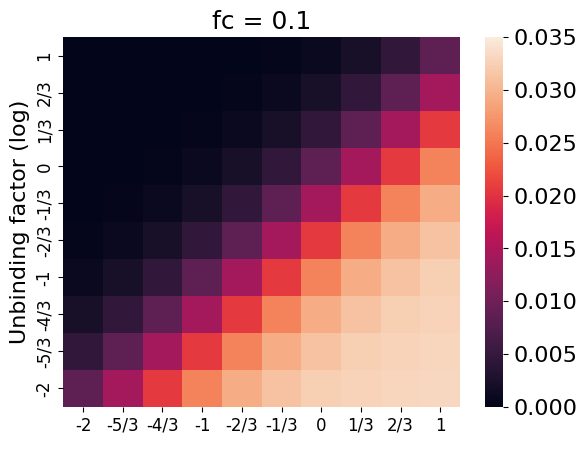

In [7]:
experiment_and_plot_log(0.1,False,True)

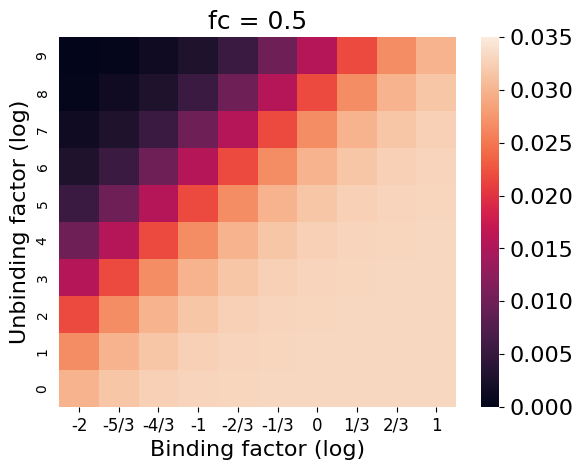

In [8]:
experiment_and_plot_log(0.5,True,False)

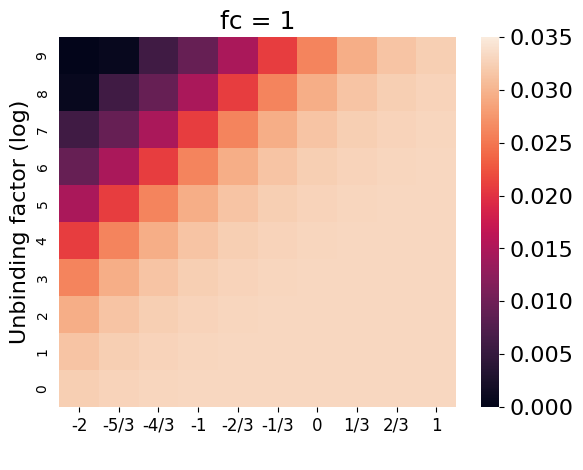

In [9]:
experiment_and_plot_log(1,False,False)